In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import pandas as pd



# Load the Fashion MNIST dataset and inspect the data shape
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Training data shape:", x_train.shape)  
print("Training labels shape:", y_train.shape)  
print("Testing data shape:", x_test.shape)  
print("Testing labels shape:", y_test.shape) 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


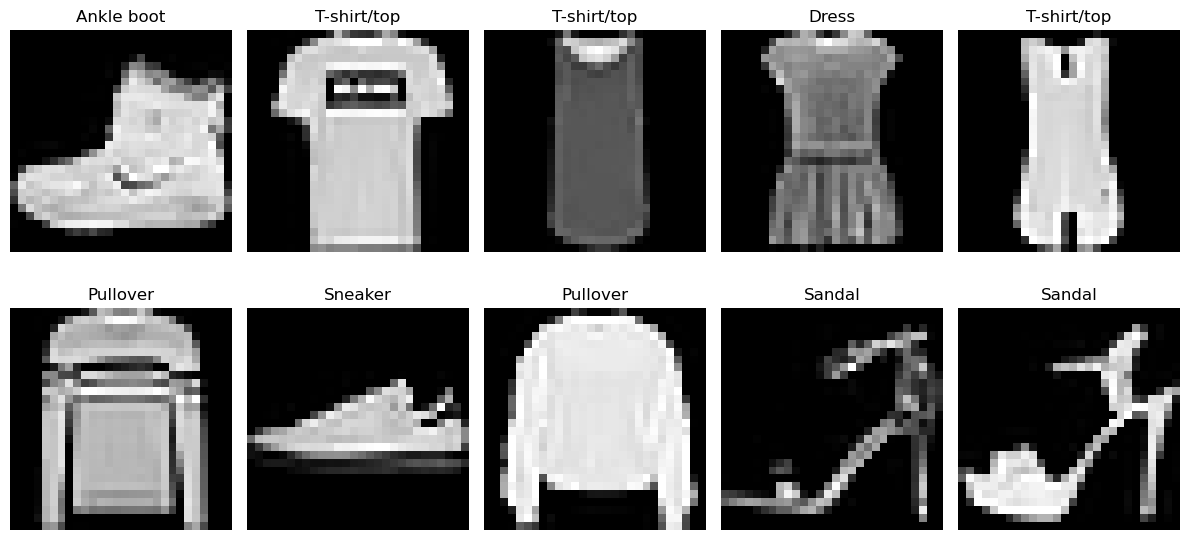

In [2]:
def plot_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 10 images from training data
plot_images(x_train, y_train, class_names)

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),           
    Dense(128, activation='relu'),            # First hidden layer with 128 neurons
    Dense(64, activation='relu'),             # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')           # Output layer for 10 classes
])
model.summary()

C:\Users\Moham\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',               # Optimizer for model
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])            # Metric to evaluate during training

In [5]:
# Trained the model with validation data
history = model.fit(x_train, y_train,
                    epochs=30,                # Number of epochs
                    batch_size=30,             # Batch size for training
                    validation_data=((x_test, y_test)))

Epoch 1/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7050 - loss: 6.2636 - val_accuracy: 0.7554 - val_loss: 0.7305
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8099 - loss: 0.5664 - val_accuracy: 0.8176 - val_loss: 0.5671
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8352 - loss: 0.4747 - val_accuracy: 0.8059 - val_loss: 0.6441
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8410 - loss: 0.4491 - val_accuracy: 0.8300 - val_loss: 0.5036
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8504 - loss: 0.4194 - val_accuracy: 0.8411 - val_loss: 0.4562
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8553 - loss: 0.4046 - val_accuracy: 0.8420 - val_loss: 0.4634
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8637 - loss: 0.3887 - val_accuracy: 0.8506 - val_loss: 0.4433
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8680 - loss: 0.3708 -

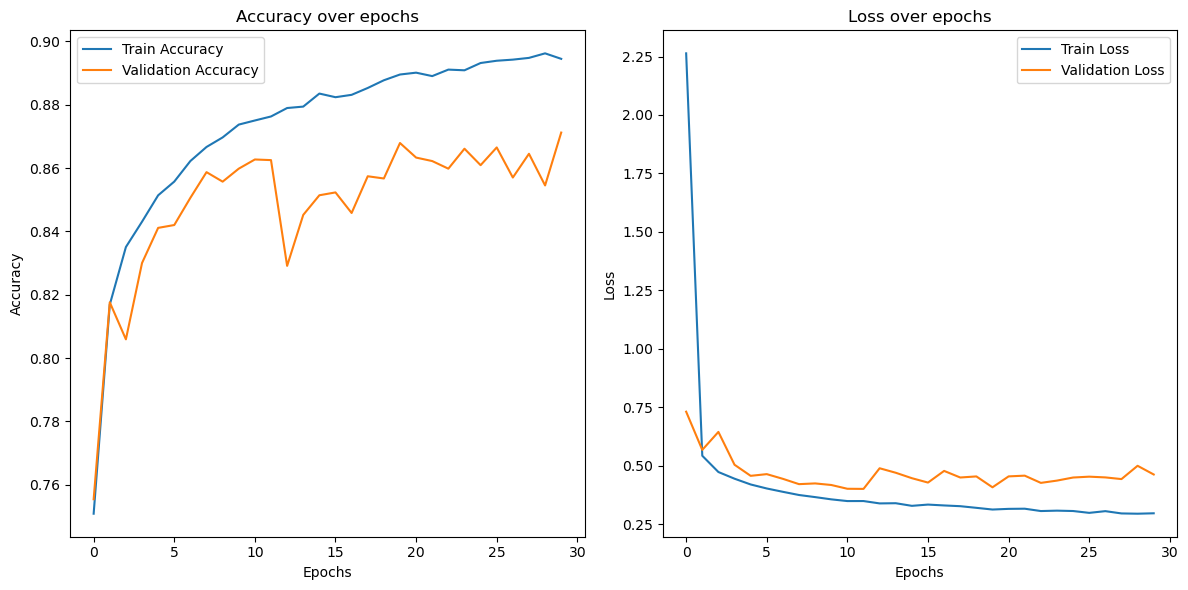

In [6]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


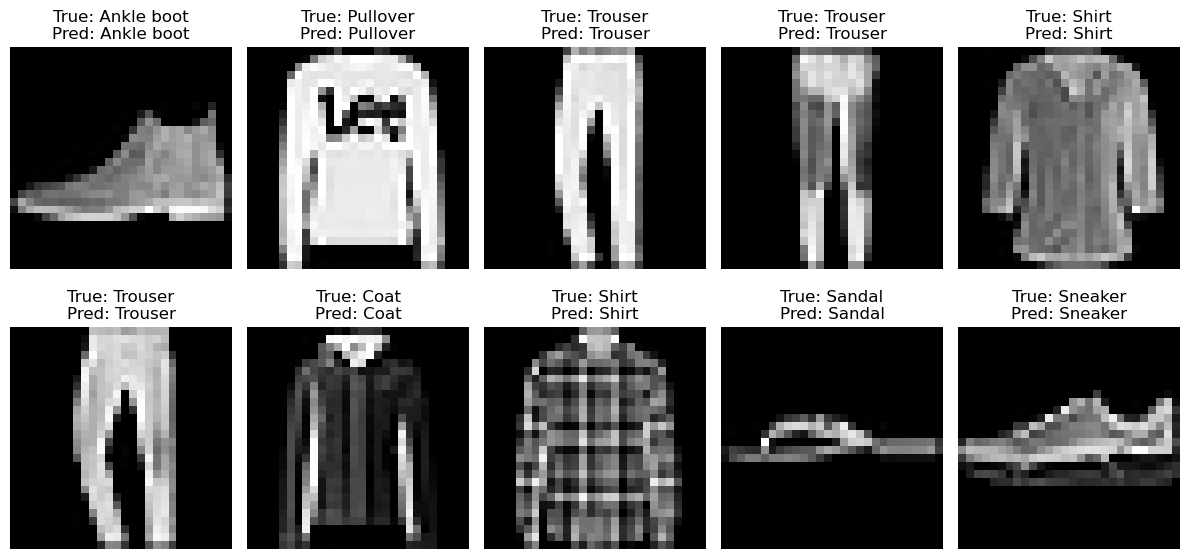

In [7]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Get the predicted class labels (the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = np.argmax(y_test, axis=1)

# Plot some of the test images with their predictions
def plot_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        title = f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}"
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 10 predictions
plot_predictions(x_test, true_labels, predicted_labels, class_names)


<function matplotlib.pyplot.show(close=None, block=None)>

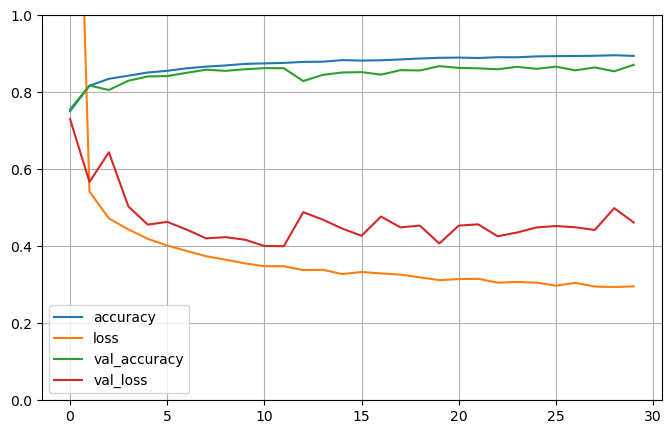

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.4744


[0.46192461252212524, 0.8712000250816345]